In [15]:
'''
    PERSONAL DETAILS:
    NAME: BOPPEY ROHITH
    ROLL_NUMBER: S20200010042
    TOPIC: IMAGE FILTERING AND EDGE DETECTION
    QUESTION_NUMBER: 1 (B)
    
'''

'\n    PERSONAL DETAILS:\n    NAME: BOPPEY ROHITH\n    ROLL_NUMBER: S20200010042\n    TOPIC: IMAGE FILTERING AND EDGE DETECTION\n    QUESTION_NUMBER: 1 (B)\n    \n'

In [16]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [17]:
# This function normalizes the pixels
def normalize_pixels(pixels):
  max = pixels.max()
  min = pixels.min()
  pixels -= min
  pixels = pixels.astype(float)
  pixels *= (255/(max-min))
  return pixels.astype(np.uint8)

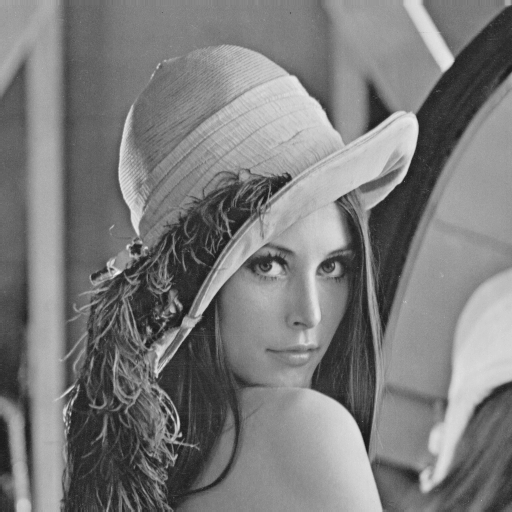

'Given Input Image'

In [18]:
input_image = Image.open("lena.gif")
display(input_image, 'Given Input Image')

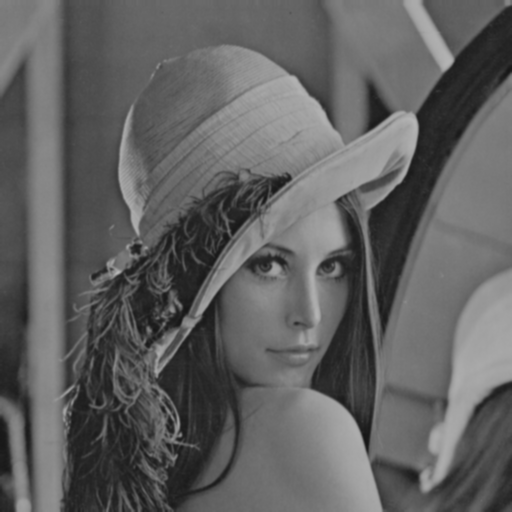

'After Gaussian Filter'

In [19]:
pixels = np.asarray(input_image)
# using Kernel
kernel = np.array([[1,2,1],[2,4,2],[1,2,1]]) / 16
gaussian_filter = cv2.filter2D(pixels, -1, kernel)
display(Image.fromarray(gaussian_filter), "After Gaussian Filter")

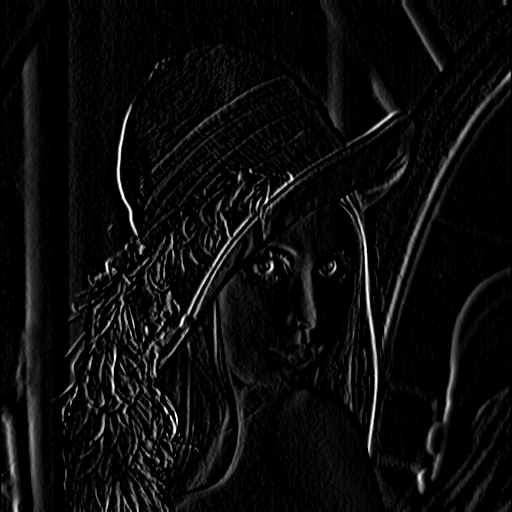

'Normalized Derivate of X'

In [20]:
# Finding derivative for x and y (Along with normalizing them)

# X
kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
derivate_of_x = cv2.filter2D(gaussian_filter, -1, kernel)
normalized_derivate_x = normalize_pixels(derivate_of_x)
display(Image.fromarray(normalized_derivate_x), "Normalized Derivate of X")


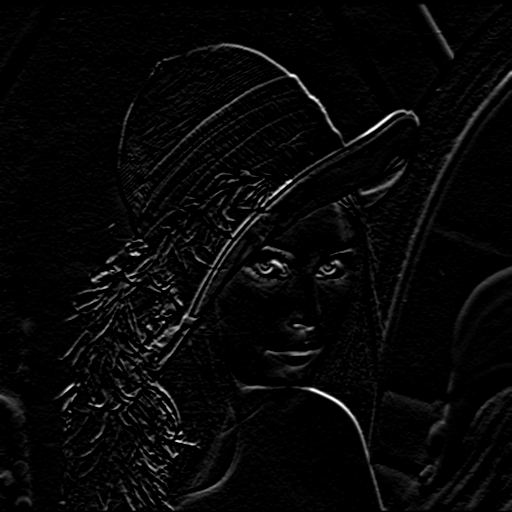

'Normalized Derivate of Y'

In [21]:
# Y
kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
derivate_of_y = cv2.filter2D(gaussian_filter, -1, kernel)
normalized_derivate_y = normalize_pixels(derivate_of_y)
display(Image.fromarray(normalized_derivate_y), "Normalized Derivate of Y")

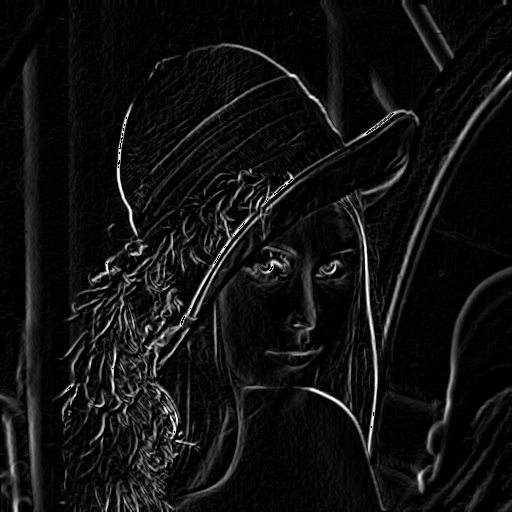

'After Mag'

In [22]:
mag_pixels = np.hypot(normalized_derivate_x, normalized_derivate_y).astype(np.uint8)
display(Image.fromarray(mag_pixels), "After Mag")


In [23]:
gmat_pixels = np.degrees(np.arctan2(normalized_derivate_y,normalized_derivate_x))
print(gmat_pixels)

[[ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 ...
 [ 0.     0.    23.19  ... 74.06  90.    90.   ]
 [ 0.     7.434 25.56  ... 35.53  65.56  90.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]]


In [24]:
def Non_Max_Sup_Function(gmag_pixels, grag_pixels):
    NMS = np.zeros(gmag_pixels.shape)
    for i in range(1, int(gmag_pixels.shape[0]) - 1):
        for j in range(1, int(gmag_pixels.shape[1]) - 1):
            if((grag_pixels[i,j] >= -22.5 and grag_pixels[i,j] <= 22.5) or (grag_pixels[i,j] <= -157.5 and grag_pixels[i,j] >= 157.5)):
                if((gmag_pixels[i,j] > gmag_pixels[i,j+1]) and (gmag_pixels[i,j] > gmag_pixels[i,j-1])):
                    NMS[i,j] = gmag_pixels[i,j]
                else:
                    NMS[i,j] = 0
            if((grag_pixels[i,j] >= 22.5 and grag_pixels[i,j] <= 67.5) or (grag_pixels[i,j] <= -112.5 and grag_pixels[i,j] >= -157.5)):
                if((gmag_pixels[i,j] > gmag_pixels[i+1,j+1]) and (gmag_pixels[i,j] > gmag_pixels[i-1,j-1])):
                    NMS[i,j] = gmag_pixels[i,j]
                else:
                    NMS[i,j] = 0
            if((grag_pixels[i,j] >= 67.5 and grag_pixels[i,j] <= 112.5) or (grag_pixels[i,j] <= -67.5 and grag_pixels[i,j] >= -112.5)):
                if((gmag_pixels[i,j] > gmag_pixels[i+1,j]) and (gmag_pixels[i,j] > gmag_pixels[i-1,j])):
                    NMS[i,j] = gmag_pixels[i,j]
                else:
                    NMS[i,j] = 0
            if((grag_pixels[i,j] >= 112.5 and grag_pixels[i,j] <= 157.5) or (grag_pixels[i,j] <= -22.5 and grag_pixels[i,j] >= -67.5)):
                if((gmag_pixels[i,j] > gmag_pixels[i+1,j-1]) and (gmag_pixels[i,j] > gmag_pixels[i-1,j+1])):
                    NMS[i,j] = gmag_pixels[i,j]
                else:
                    NMS[i,j] = 0
    return NMS



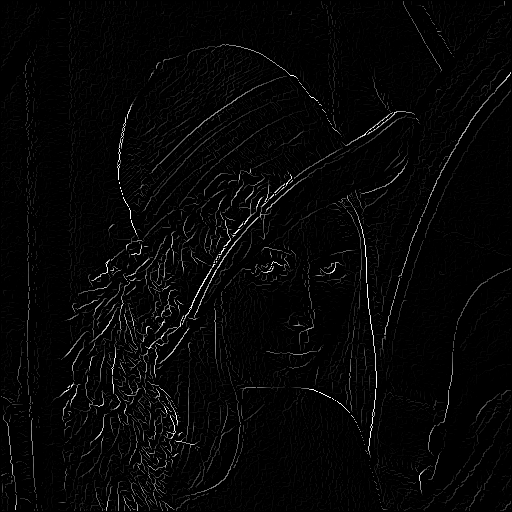

'After Non Max Sup'

In [25]:
NonMaxSupResults = Non_Max_Sup_Function(mag_pixels, gmat_pixels)
NonMaxSupResults = normalize_pixels(NonMaxSupResults)
display(Image.fromarray(NonMaxSupResults), "After Non Max Sup")

In [26]:
# Threshold Hysteric function
def ThresholdHysteric(img):
    high_T_ratio =0.32
    low_T_ratio = 0.30
    gsup_res = np.copy(img)
    h = int(gsup_res.shape[0])
    w = int(gsup_res.shape[1])
    high_T = np.max(gsup_res) * high_T_ratio
    low_T = high_T * low_T_ratio    
    for i in range(1,h-1):
        for j in range(1,w-1):
            if(gsup_res[i,j] > high_T):
                gsup_res[i,j] = 1
            elif(gsup_res[i,j] < low_T):
                gsup_res[i,j] = 0
            else:
                if((gsup_res[i-1,j-1] > high_T) or 
                    (gsup_res[i-1,j] > high_T) or
                    (gsup_res[i-1,j+1] > high_T) or
                    (gsup_res[i,j-1] > high_T) or
                    (gsup_res[i,j+1] > high_T) or
                    (gsup_res[i+1,j-1] > high_T) or
                    (gsup_res[i+1,j] > high_T) or
                    (gsup_res[i+1,j+1] > high_T)):
                    gsup_res[i,j] = 1

    gsup_res = (gsup_res == 1) * gsup_res 
    return gsup_res

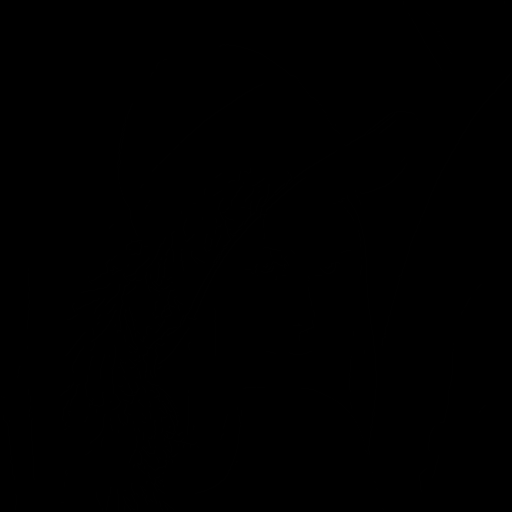

'After Threshold Hysteric'

In [27]:
edges = ThresholdHysteric(NonMaxSupResults)
display(Image.fromarray(edges), "After Threshold Hysteric")

In [28]:
'''
    PERSONAL DETAILS:
    NAME: BOPPEY ROHITH
    ROLL_NUMBER: S20200010042
    TOPIC: IMAGE FILTERING AND EDGE DETECTION
    QUESTION_NUMBER: 2 (B)
    
'''

'\n    PERSONAL DETAILS:\n    NAME: BOPPEY ROHITH\n    ROLL_NUMBER: S20200010042\n    TOPIC: IMAGE FILTERING AND EDGE DETECTION\n    QUESTION_NUMBER: 2 (B)\n    \n'